In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("cleaned_data.xlsx")

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Request Date,Request Hour\t,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:00,2016-07-13 09:25:47
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15,23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15,23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15,23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15,23:54:00,NaT


In [4]:
df=df.rename(columns={'Request Hour\t': 'Request Hour'})

In [5]:
df['Request Hour'] = pd.to_datetime(df['Request Hour'], format='%H:%M:%S')

In [6]:
df['hour'] = df['Request Hour'].dt.hour

In [7]:
df.shape

(6745, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Request Date       6745 non-null   datetime64[ns]
 6   Request Hour       6745 non-null   datetime64[ns]
 7   Drop timestamp     2831 non-null   datetime64[ns]
 8   hour               6745 non-null   int32         
dtypes: datetime64[ns](4), float64(1), int32(1), int64(1), object(2)
memory usage: 448.0+ KB


In [ ]:
### Missing Values Summary

In [9]:
print(df.isna().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Request Date            0
Request Hour            0
Drop timestamp       3914
hour                    0
dtype: int64


In [ ]:
### Count of Each Status

In [10]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [ ]:
### Requests by Pickup Point and Status

In [11]:
print(df.groupby(['Pickup point', 'Status'])['Request id'].count())

Pickup point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
Name: Request id, dtype: int64


In [ ]:
### Status Distribution Plot

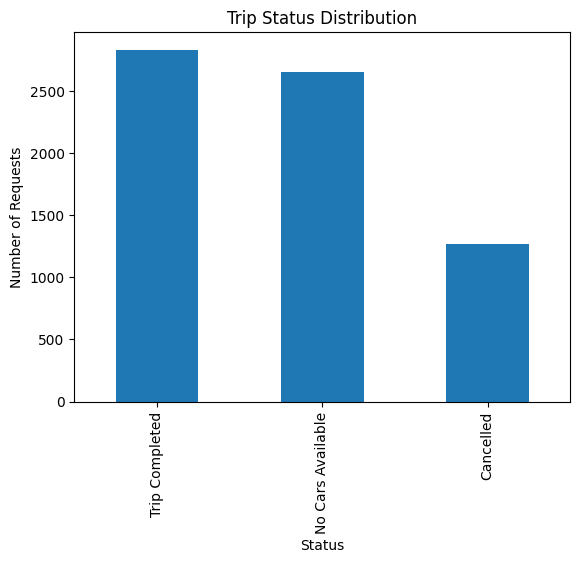

In [12]:
df['Status'].value_counts().plot(kind='bar', title='Trip Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.show()

### Requests by Hour of Day

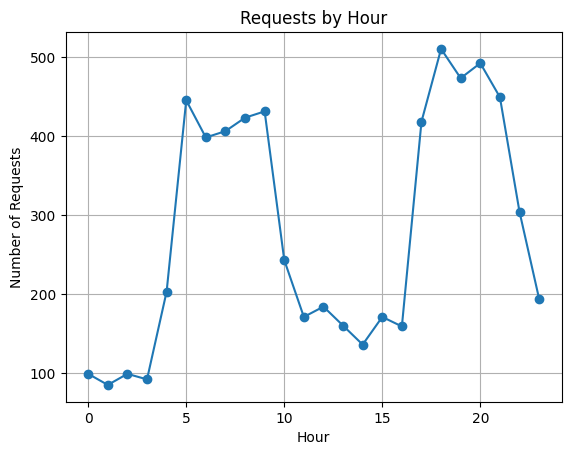

In [13]:
df.groupby('hour')['Request id'].count().plot(kind='line', title='Requests by Hour', marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.show()

### Failed Requests by Hour

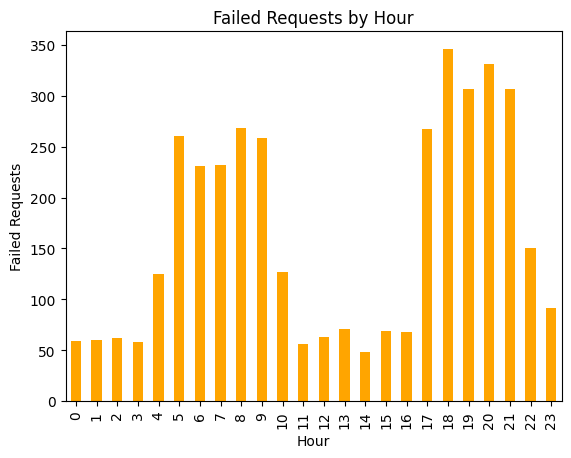

In [14]:
failed_df = df[df['Status'] != 'Trip Completed']
failed_df.groupby('hour')['Request id'].count().plot(kind='bar', title='Failed Requests by Hour', color='orange')
plt.xlabel('Hour')
plt.ylabel('Failed Requests')
plt.show()

### Requests by Pickup Point and Hour

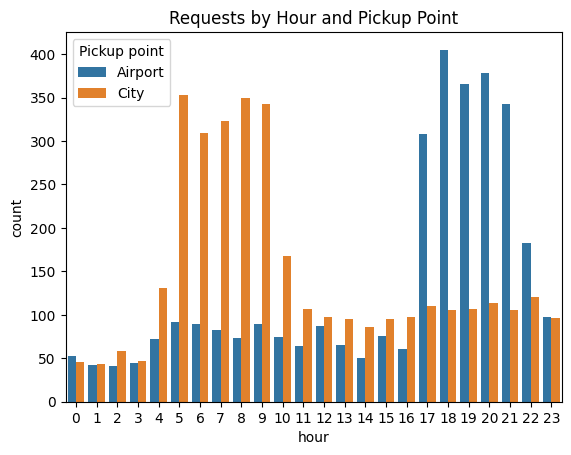

In [15]:
sns.countplot(data=df, x='hour', hue='Pickup point')
plt.title('Requests by Hour and Pickup Point')
plt.show()

### Trip Duration

In [16]:
df['Trip Duration (min)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
print(df['Trip Duration (min)'].describe())

count    2831.000000
mean       52.413753
std        13.850693
min        20.783333
25%        41.000000
50%        52.083333
75%        64.000000
max        83.000000
Name: Trip Duration (min), dtype: float64
